# Neural Network study

## Objectives

* fit a neural network

## Inputs

- outputs/datasets/collection/algo.csv
- Instructions on which variables to use for data cleaning and feature engineering. They are found in each respective notebook.

## Outputs
- Test set (features and target)- 
- Data cleaning and Feature Engineering pipeline
- Modeling pipeline
- Feature importance plot. 


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/test/jupyter_notebooks'

We want to make the parent of the current directory the new current directory.
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/test'

---

# Step 1: Load Data

In [4]:
import numpy as np
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/house_prices_records.csv")
  )

print(df.shape)
df.head(3)

(1460, 24)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500


---

# Step 2: ML Pipeline with all data

## ML pipeline for Data Cleaning

Custom Class for Hyperparameter Optimisation from code institute

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from feature_engine.selection import DropFeatures
from feature_engine.imputation import CategoricalImputer, MeanMedianImputer
from feature_engine.encoding import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense

In [10]:
def preprocessing_pipeline():
    return Pipeline([
        ("DropFeatures", DropFeatures(features_to_drop=['EnclosedPorch', 'WoodDeckSF'])),
        ("MeanMedianImputer", MeanMedianImputer(imputation_method='median',
                                                variables=['LotFrontage', 'BedroomAbvGr', '2ndFlrSF', 'GarageYrBlt', 'MasVnrArea'])),
        ("CategoricalImputer", CategoricalImputer(imputation_method='missing', fill_value='Unf',
                                                  variables=['GarageFinish', 'BsmtFinType1'])),
        ("Ordinalencoder", OrdinalEncoder(encoding_method='arbitrary',
                                           variables=['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual'])),
        ("StandardScaler", StandardScaler())
    ])

preprocessing = preprocessing_pipeline()
df_processed = preprocessing.fit_transform(df)

# Create a list of column names excluding the dropped features
columns_after_preprocessing = [col for col in df.columns if col not in ['EnclosedPorch', 'WoodDeckSF']]

# Convert the NumPy array back to a DataFrame with the correct column names
df_processed = pd.DataFrame(df_processed, columns=columns_after_preprocessing)

# Now you can use df_processed as a DataFrame
print(df_processed.shape)
df_processed.head(3)

(1460, 22)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,-0.793434,1.213595,0.153895,-0.651112,0.575425,-1.156900,-0.944591,0.351000,-1.308321,1.017598,...,-0.207142,-0.220875,0.514104,0.216503,-0.517200,0.651479,-0.459303,1.050994,0.878668,0.347273
1,0.257140,-0.756746,0.153895,0.156555,1.171992,-0.535688,-0.641228,-0.060731,-1.308321,-0.107927,...,-0.091886,0.460320,-0.570750,-0.704483,2.179628,-0.071836,0.466465,0.156734,-0.429577,0.007288
2,-0.627826,1.241281,0.153895,0.964222,0.092907,-1.156900,-0.301643,0.631726,-1.308321,0.934226,...,0.073480,-0.084636,0.325915,-0.070361,-0.517200,0.651479,-0.313369,0.984752,0.830215,0.536154


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_processed.drop(['SalePrice'], axis=1),
    df_processed['SalePrice'],
    test_size=0.2,
    random_state=0,
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1168, 21) (1168,) (292, 21) (292,)


In [12]:
model = keras.Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')

2023-10-08 17:10:06.312949: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
history = model.fit(X_train, y_train, epochs=45, batch_size=32, validation_data=(X_test, y_test))

2023-10-08 17:10:13.473400: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/45
37/37 [==============================] - 2s 13ms/step - loss: 0.3245 - val_loss: 0.4321
Epoch 2/45
37/37 [==============================] - 0s 5ms/step - loss: 0.1432 - val_loss: 0.4023
Epoch 3/45
37/37 [==============================] - 0s 5ms/step - loss: 0.1173 - val_loss: 0.3563
Epoch 4/45
37/37 [==============================] - 0s 5ms/step - loss: 0.1166 - val_loss: 0.3648
Epoch 5/45
37/37 [==============================] - 0s 5ms/step - loss: 0.0981 - val_loss: 0.3362
Epoch 6/45
37/37 [==============================] - 0s 5ms/step - loss: 0.0877 - val_loss: 0.3897
Epoch 7/45
37/37 [==============================] - 0s 4ms/step - loss: 0.0932 - val_loss: 0.3631
Epoch 8/45
37/37 [==============================] - 0s 7ms/step - loss: 0.0764 - val_loss: 0.3156
Epoch 9/45
37/37 [==============================] - 0s 8ms/step - loss: 0.0721 - val_loss: 0.3673
Epoch 10/45
37/37 [==============================] - 0s 5ms/step - loss: 0.0620 - val_loss: 0.3635
Epoch 11/45
37/37 

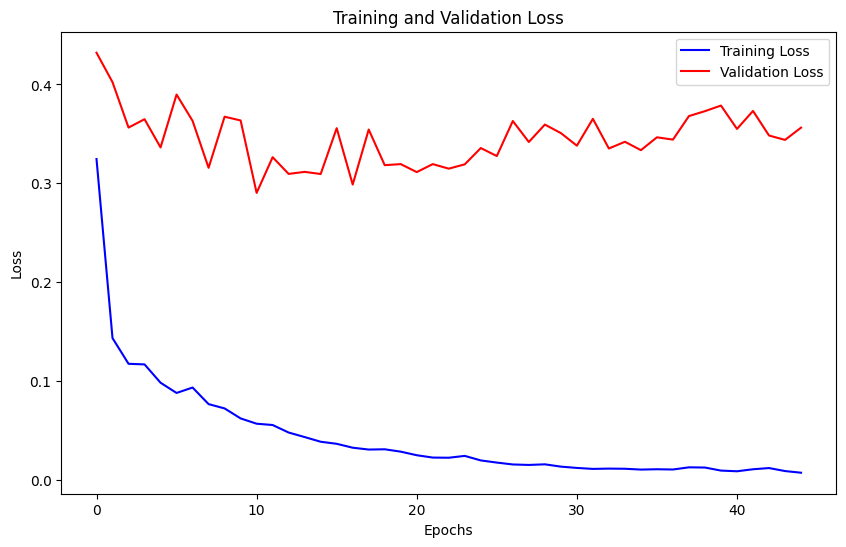

In [14]:
import matplotlib.pyplot as plt

# Access loss values from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a plot to visualize the loss
plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss', color='blue')
plt.plot(validation_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [15]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.35622688334622


In [16]:
first_layer_weights = model.layers[0].get_weights()[0]

# Calculate feature importances by taking the absolute sum of weights for each feature
feature_importances = abs(first_layer_weights).sum(axis=1)

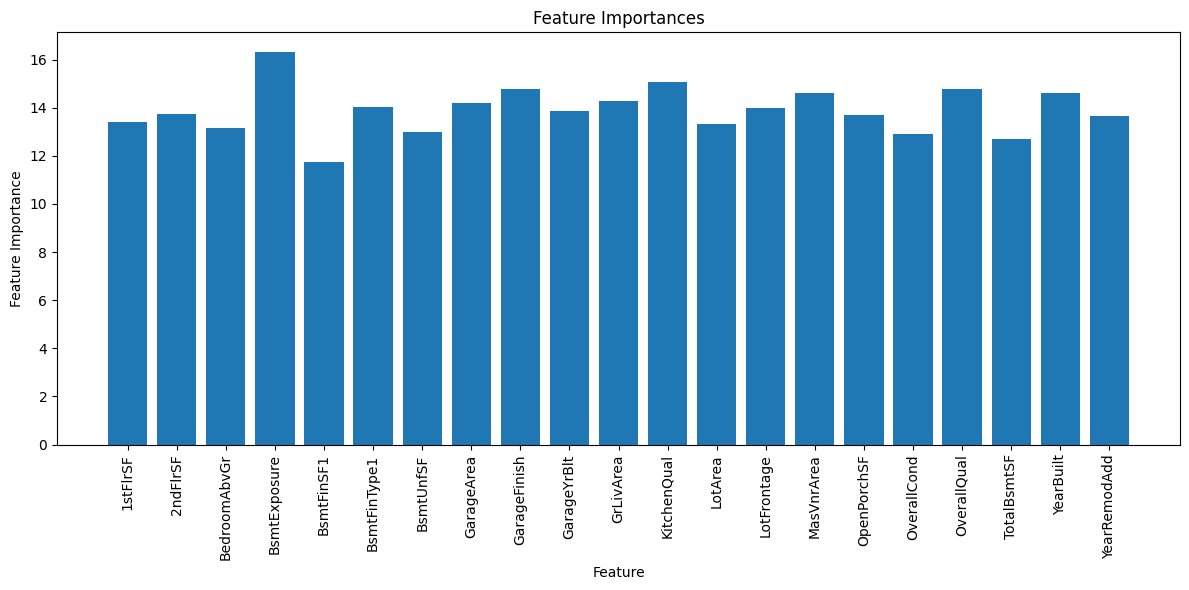

In [20]:
feature_names = df_processed.columns.tolist()

# Drop a specific column name
column_to_drop = "SalePrice"
if column_to_drop in feature_names:
    feature_names.remove(column_to_drop)
plt.figure(figsize=(12, 6))
plt.bar(range(X_train.shape[1]), feature_importances)
plt.xticks(range(X_train.shape[1]), feature_names, rotation=90)  # Set feature names on the x-axis
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

## Conclusion

It appears that all the features in the dataset may hold significant importance. This could be due to the limited amount of data available for the neural network to effectively discern the most crucial features and produce consistent results. Consequently, traditional machine learning models might outperform the neural network in this scenario. Research on optimizing neural network architecture is essential.

---